In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = df = pd.read_csv('data_titanic.csv', header='infer', sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"].fillna("S", inplace=True)
df["Name"] = df["Name"].str.split(", ").str[1].str.split(".").str[0]
df.drop(["Cabin"], axis=1, inplace=True, errors="ignore")
encoder = LabelEncoder()
df["Sex"]= encoder.fit_transform(df["Sex"])

In [4]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

df = df.replace({"Name" : Title_Dictionary})
df["Name"].value_counts()
encoder_name = LabelEncoder()
df["Name"]= encoder_name.fit_transform(df["Name"])
df.drop(["Ticket"], axis=1, inplace=True, errors="ignore")
df.drop(["PassengerId"], axis=1, inplace=True, errors="ignore")
df.drop(["SibSp"], axis=1, inplace=True, errors="ignore")
df.drop(["Parch"], axis=1, inplace=True, errors="ignore")

In [5]:
embarked = LabelEncoder()
df["Embarked"] = embarked.fit_transform(df["Embarked"])

df['AgeCategory'] = pd.qcut(df.Age,7)
AgeCategory = LabelEncoder()
df["AgeCategory"] = AgeCategory.fit_transform(df["AgeCategory"])

df['FareCategory'] = pd.qcut(df.Fare,7) 
AgeCategory = LabelEncoder()
df["FareCategory"] = AgeCategory.fit_transform(df["FareCategory"])

X = df.drop(columns=["Survived", "Age", "Fare", "FareCategory"], axis=0)
y = df["Survived"].replace("No",0)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

416    1
801    1
512    1
455    1
757    0
Name: Survived, dtype: int64

score:0.8171641791044776


[Text(0.3726186497326203, 0.9583333333333334, 'Sex <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [379, 244]\nclass = S'),
 Text(0.17446524064171123, 0.875, 'Pclass <= 2.5\ngini = 0.382\nsamples = 222\nvalue = [57, 165]\nclass = u'),
 Text(0.06951871657754011, 0.7916666666666666, 'Pclass <= 1.5\ngini = 0.097\nsamples = 118\nvalue = [6, 112]\nclass = u'),
 Text(0.0427807486631016, 0.7083333333333334, 'AgeCategory <= 0.5\ngini = 0.031\nsamples = 64\nvalue = [1, 63]\nclass = u'),
 Text(0.03208556149732621, 0.625, 'Name <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = u'),
 Text(0.0213903743315508, 0.5416666666666666, 'Embarked <= 1.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = u'),
 Text(0.0106951871657754, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = u'),
 Text(0.03208556149732621, 0.4583333333333333, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = u'),
 Text(0.0427807486631016, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclas

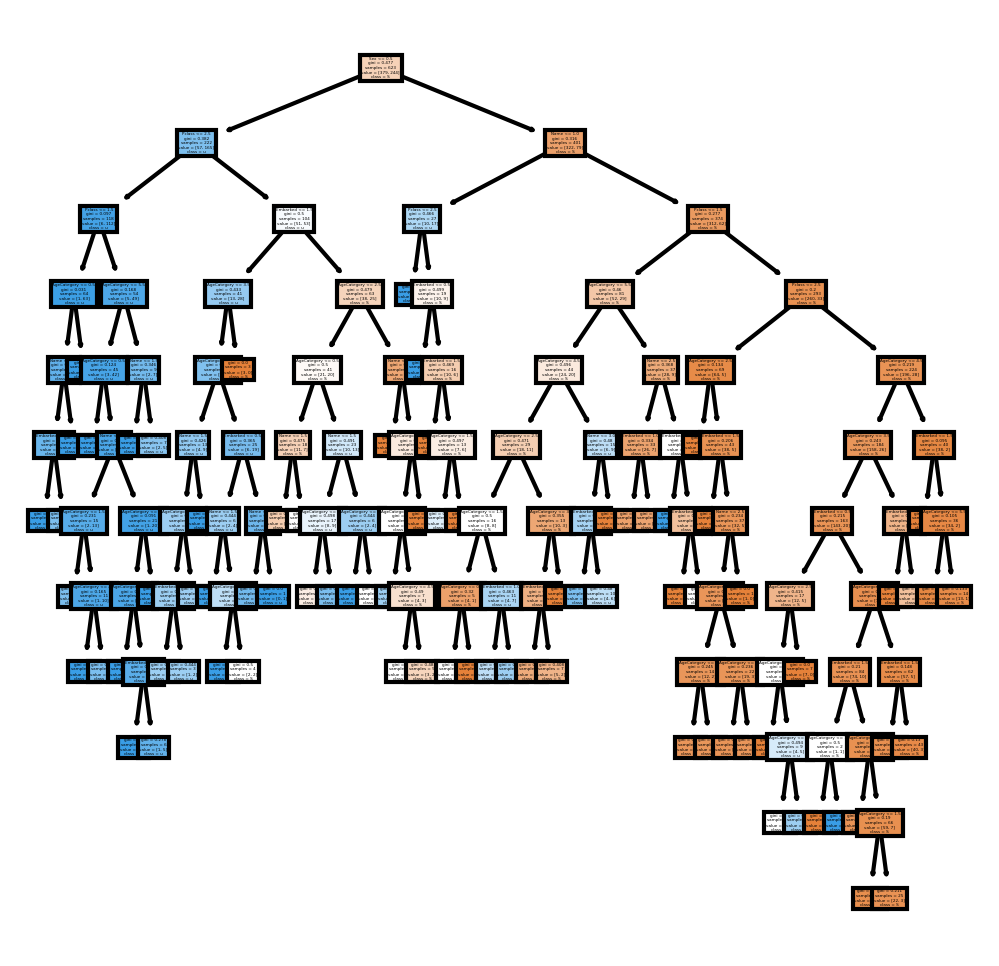

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

t = DecisionTreeClassifier(class_weight=None,
                           criterion='gini')
DecisionTreeClassifier()
t.fit(X_train, Y_train)
y_pred = t.predict(X_test)
print('score:{}'.format(accuracy_score(Y_test, y_pred)))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(t,
               feature_names=list(X.columns),
               class_names="Survived",
               filled=True)

score:0.8470149253731343


[Text(0.4230769230769231, 0.9166666666666666, 'Sex <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [379, 244]\nclass = S'),
 Text(0.15384615384615385, 0.75, 'Pclass <= 2.5\ngini = 0.382\nsamples = 222\nvalue = [57, 165]\nclass = u'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.097\nsamples = 118\nvalue = [6, 112]\nclass = u'),
 Text(0.23076923076923078, 0.5833333333333334, 'Embarked <= 1.5\ngini = 0.5\nsamples = 104\nvalue = [51, 53]\nclass = u'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.433\nsamples = 41\nvalue = [13, 28]\nclass = u'),
 Text(0.3076923076923077, 0.4166666666666667, 'AgeCategory <= 2.5\ngini = 0.479\nsamples = 63\nvalue = [38, 25]\nclass = S'),
 Text(0.23076923076923078, 0.25, 'gini = 0.5\nsamples = 41\nvalue = [21, 20]\nclass = S'),
 Text(0.38461538461538464, 0.25, 'Name <= 1.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = S'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = S'),
 Text

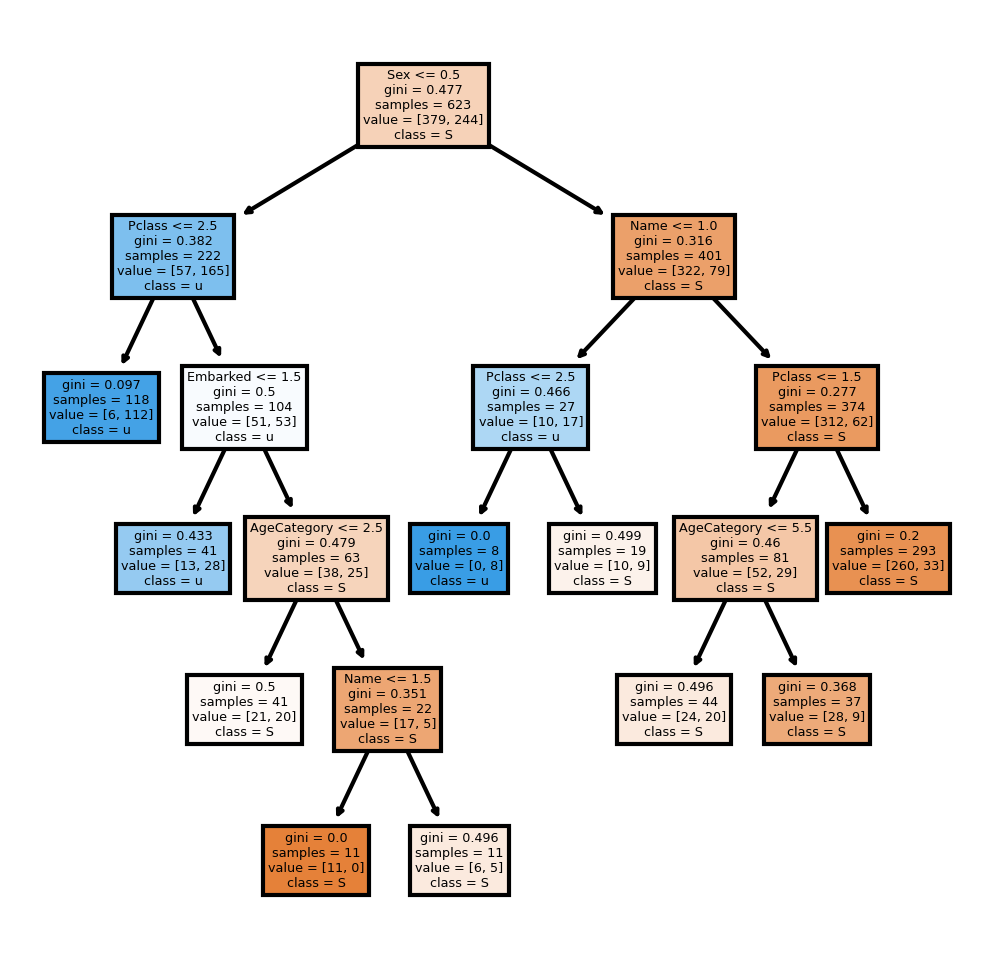

In [66]:
t = DecisionTreeClassifier(class_weight=None,
                           criterion='gini',
                           max_depth=5,
                           max_features=None,
                           max_leaf_nodes=10,
                           min_samples_leaf=5,
                           min_samples_split=2,
                           min_weight_fraction_leaf=0.0,
                           random_state=None,
                           splitter='best')
DecisionTreeClassifier()
t.fit(X_train, Y_train)
y_pred = t.predict(X_test)
print('score:{}'.format(accuracy_score(Y_test, y_pred)))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(t,
               feature_names=list(X.columns),
               class_names="Survived",
               filled=True)

In [125]:
from sklearn.ensemble import RandomForestClassifier
max = 0
for n in range(1, 50):
    clf = RandomForestClassifier(n_estimators=n,
                                 criterion='gini',
                                 max_depth=10,
                                 max_features=None,
                                 max_leaf_nodes=10,
                                 min_samples_leaf=5,
                                 min_samples_split=5,
                                 min_weight_fraction_leaf=0.0,
                                 random_state=None)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
#     print('Accuracy:', score)
    if(max < score):
        max = score
print("maximum score is :",max)

maximum score is : 0.8507462686567164


In [ ]:
max = 0
score = 0
while(score < 9):
    n = random.randint(1,50)
    clf = RandomForestClassifier(n_estimators=n,
                                 criterion='gini',
                                 max_depth=10,
                                 max_features=None,
                                 max_leaf_nodes=10,
                                 min_samples_leaf=5,
                                 min_samples_split=5,
                                 min_weight_fraction_leaf=0.0,
                                 random_state=None
                                 )
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
    if(max < score):
        max = score
        print("Current max is ", max, "Estimator is ", n)
    if(score >= 9):
        break
print("Final score is :", score)

Current max is  0.8134328358208955 Estimator is  39
Current max is  0.8208955223880597 Estimator is  24
Current max is  0.8246268656716418 Estimator is  38
Current max is  0.8470149253731343 Estimator is  19
Current max is  0.8507462686567164 Estimator is  13
Current max is  0.8544776119402985 Estimator is  5


In [ ]:
#It would seem that the highest result of accuracy is belonging to Random forest with the percentage of 85.44%